# This is with Compiled Dataset (year 2021)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_excel('Meto 1 month Data.xlsx')

In [4]:
#df = pd.concat(pd.read_excel('Meto 1 month Data.xlsx', sheet_name=None), ignore_index=True)

In [5]:
df.head()

,VesselName,GPSTimeStamp,Latitude,Longitude,Cog,Sog,WindSpeedInKnots,WindDirectionInDegrees,SeaHeightInMeters,SwellDirectionInDegrees,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees
0,CASTILLO DE MONTERREAL,2021-12-01 04:06:00,"36°10'10""N","5°24'14""W",20,0.000,9,270,0.36,273,0.4,273,0.11,68
1,CASTILLO DE MONTERREAL,2021-12-01 10:06:00,"36°10'12""N","5°24'12""W",20,0.000,15,270,0.36,270,0.5,270,0.08,169
2,CASTILLO DE MONTERREAL,2021-12-01 16:08:00,"36°10'14""N","5°24'10""W",188,0.540,18,270,0.44,246,0.9,270,0.10,170
3,CASTILLO DE MONTERREAL,2021-12-01 22:08:00,"35°58'05""N","5°52'02""W",268,11.339,20,284,0.56,276,1.3,284,0.14,100
4,CASTILLO DE MONTERREAL,2021-12-02 04:08:00,"36°06'12""N","6°16'00""W",94,0.000,22,311,0.63,263,1.9,311,0.47,100


In [5]:
#df.describe()

In [6]:
df = df[(df['WindSpeedInKnots'] < 21.5) & (df['Sog'] >= 9) &  (df['TotalWaveHeightInMeters'] < 2.5) & (df['TotalWaveHeightInMeters'] < 7.3)]

In [8]:
df.head(2)

,VesselName,GPSTimeStamp,Latitude,Longitude,Cog,Sog,WindSpeedInKnots,WindDirectionInDegrees,SeaHeightInMeters,SwellDirectionInDegrees,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees
3,CASTILLO DE MONTERREAL,2021-12-01 22:08:00,"35°58'05""N","5°52'02""W",268,11.339,20,284,0.56,276,1.3,284,0.14,100
53,CASTILLO DE MONTERREAL,2021-12-14 10:08:00,"36°28'29""N","6°41'50""W",343,12.419,14,106,1.26,310,1.4,310,0.20,330


# Beaufort-scale-values-Conversion

In [9]:
def f(row):
    if (row['WindSpeedInKnots'] >= 0) & (row['WindSpeedInKnots'] <= 1):
        val = ('B0')
    elif (row['WindSpeedInKnots'] > 1) & (row['WindSpeedInKnots'] <= 3.5):
        val = ('B1')
    elif (row['WindSpeedInKnots'] > 3.5) & (row['WindSpeedInKnots'] <= 6.5):
        val = ('B2')
    elif (row['WindSpeedInKnots'] > 6.5) & (row['WindSpeedInKnots'] <= 10.5):
        val = ('B3')
    elif (row['WindSpeedInKnots'] > 10.5) & (row['WindSpeedInKnots'] <= 16.5):
        val = ('B4')
    elif (row['WindSpeedInKnots'] > 16.5) & (row['WindSpeedInKnots'] <= 21.5):
        val = ('B5')
    elif (row['WindSpeedInKnots'] > 21.5) & (row['WindSpeedInKnots'] <= 27.5):
        val = ('B6')
    elif (row['WindSpeedInKnots'] > 27.5) & (row['WindSpeedInKnots'] <= 33.5):
        val = ('B7')
    elif (row['WindSpeedInKnots'] > 33.5) & (row['WindSpeedInKnots'] <= 40.5):
        val = ('B8')
    elif (row['WindSpeedInKnots'] > 40.5) & (row['WindSpeedInKnots'] <= 47.5):
        val = ('B9')
    elif (row['WindSpeedInKnots'] > 47.5) & (row['WindSpeedInKnots'] <= 55.5):
        val = ('B10')
    elif (row['WindSpeedInKnots'] > 55.5) & (row['WindSpeedInKnots'] <= 63.5):
        val = ('B11')
    elif (row['WindSpeedInKnots'] > 63.5) & (row['WindSpeedInKnots'] <= 71):
        val = ('B12')
    else:
        val = ('Nedd to classify')
    return val

In [10]:
 df['Beaufort'] = df.apply(f, axis=1)

In [11]:
df.head(5)

,VesselName,GPSTimeStamp,Latitude,Longitude,Cog,Sog,WindSpeedInKnots,WindDirectionInDegrees,SeaHeightInMeters,SwellDirectionInDegrees,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees,Beaufort
3,CASTILLO DE MONTERREAL,2021-12-01 22:08:00,"35°58'05""N","5°52'02""W",268,11.339,20,284,0.56,276,1.3,284,0.14,100,B5
53,CASTILLO DE MONTERREAL,2021-12-14 10:08:00,"36°28'29""N","6°41'50""W",343,12.419,14,106,1.26,310,1.4,310,0.20,330,B4
63,CASTILLO DE MONTERREAL,2021-12-16 22:08:00,"36°47'05""N","1°37'53""W",46,10.799,17,39,0.24,10,1.8,39,0.27,290,B5
64,CASTILLO DE MONTERREAL,2021-12-17 04:08:00,"37°31'29""N","0°33'17""W",48,11.339,16,53,0.34,100,1.3,53,0.26,350,B4
65,CASTILLO DE MONTERREAL,2021-12-17 10:08:00,"38°30'50""N","0°18'10""E",35,12.419,14,40,0.70,66,1.0,40,0.10,250,B4


# Douglas-sea-scale-of-wave-height-Conversion

In [12]:
def g(row):
    if (row['TotalWaveHeightInMeters'] == 0.00):
        val = ('Dss0')
    elif (row['TotalWaveHeightInMeters'] > 0) & (row['TotalWaveHeightInMeters'] <= 0.1):
        val = ('Dss1')
    elif (row['TotalWaveHeightInMeters'] > 0.1) & (row['TotalWaveHeightInMeters'] <= 0.5):
        val = ('Dss2')
    elif (row['TotalWaveHeightInMeters'] > 0.5) & (row['TotalWaveHeightInMeters'] <= 1.25):
        val = ('Dss3')
    elif (row['TotalWaveHeightInMeters'] > 1.25) & (row['TotalWaveHeightInMeters'] <= 2.5):
        val = ('Dss4')
    elif (row['TotalWaveHeightInMeters'] > 2.5) & (row['TotalWaveHeightInMeters'] <= 4):
        val = ('Dss5')
    elif (row['TotalWaveHeightInMeters'] > 4) & (row['TotalWaveHeightInMeters'] <= 6):
        val = ('Dss6')
    elif (row['TotalWaveHeightInMeters'] > 6) & (row['TotalWaveHeightInMeters'] <= 9):
        val = ('Dss7')
    elif (row['TotalWaveHeightInMeters'] > 9) & (row['TotalWaveHeightInMeters'] <= 14):
        val = ('Dss8')
    elif (row['TotalWaveHeightInMeters'] > 14) :
        val = ('Dss9')
    else:
        val = ('Nedd to classify')
    return val

In [13]:
 df['Douglas'] = df.apply(g, axis=1)

In [14]:
df.head(2)

,VesselName,GPSTimeStamp,Latitude,Longitude,Cog,Sog,WindSpeedInKnots,WindDirectionInDegrees,SeaHeightInMeters,SwellDirectionInDegrees,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees,Beaufort,Douglas
3,CASTILLO DE MONTERREAL,2021-12-01 22:08:00,"35°58'05""N","5°52'02""W",268,11.339,20,284,0.56,276,1.3,284,0.14,100,B5,Dss4
53,CASTILLO DE MONTERREAL,2021-12-14 10:08:00,"36°28'29""N","6°41'50""W",343,12.419,14,106,1.26,310,1.4,310,0.20,330,B4,Dss4



# Convert Lat long for Regression

In [61]:
import re

def dms2dd(s):
    # example: s = """0°51'56.29"S"""
    degrees, minutes, seconds, direction = re.split('[°\'"]+', s)
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','W'):
        dd*= -1
    return dd


df['Latitude_conv'] = df['Latitude'].apply(dms2dd)
df['Longitudedd_conv'] = df['Longitude'].apply(dms2dd)

In [63]:
df.head(2)

,VesselName,GPSTimeStamp,Latitude,Longitude,Cog,Sog,WindSpeedInKnots,WindDirectionInDegrees,SeaHeightInMeters,SwellDirectionInDegrees,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees,Beaufort,Douglas,Latitude_conv,Longitudedd_conv
3,CASTILLO DE MONTERREAL,2021-12-01 22:08:00,"35°58'05""N","5°52'02""W",268,11.339,20,284,0.56,276,1.3,284,0.14,100,B5,Dss4,35.968056,-5.867222
53,CASTILLO DE MONTERREAL,2021-12-14 10:08:00,"36°28'29""N","6°41'50""W",343,12.419,14,106,1.26,310,1.4,310,0.20,330,B4,Dss4,36.474722,-6.697222


# Machine Learning for Logistic Regression

In [73]:
# Remove column name 'A' for Logistic Regression
df_new = df.drop(['VesselName','GPSTimeStamp','Latitude','Longitude','Cog','Sog','Beaufort','TotalWaveHeightInMeters','SeaHeightInMeters','SwellDirectionInDegrees','SeaCurrentSpeedInKnots','SeaCurrentDirectionInDegrees',"TotalWaveDirectionInDegrees"], axis = 1)

In [74]:
df_new.head(1)

,WindSpeedInKnots,WindDirectionInDegrees,Douglas,Latitude_conv,Longitudedd_conv
3,20,284,Dss4,35.968056,-5.867222


In [83]:
df_new.describe()

,WindSpeedInKnots,WindDirectionInDegrees,Latitude_conv,Longitudedd_conv
count,269749.000000,269749.000000,269749.000000,269749.000000
mean,12.343104,167.312201,22.032274,30.575502
std,4.425077,106.143189,28.592687,67.341551
min,0.000000,0.000000,-43.285278,-162.327500
25%,9.000000,71.000000,2.850556,0.269444
50%,12.000000,158.000000,26.673333,19.851944
75%,16.000000,265.000000,48.123333,59.267222
max,21.000000,359.000000,60.861667,167.107500


In [75]:
from matplotlib import pyplot as plt

In [76]:
target = df_new.Douglas

In [77]:
# inputs = df_new.WindSpeedInKnots

In [78]:
inputs = df_new.drop('Douglas', axis = 'columns')

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [81]:
model.fit(X_train, y_train)

C:\Users\addsouza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
model.score(X_test, y_test)

0.6499536607970343

In [27]:
model.predict(X_test)

array(['Dss3', 'Dss3', 'Dss3', ..., 'Dss4', 'Dss4', 'Dss4'], dtype=object)

# END

Text(0, 0.5, 'WindSpeedInKnots')

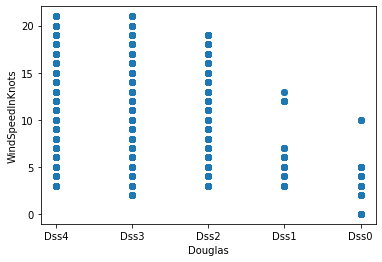

In [55]:
plt.scatter(df_new.Douglas,df_new.WindSpeedInKnots)
plt.xlabel('Douglas')
plt.ylabel('WindSpeedInKnots')

In [56]:
df_plot = df[df['Douglas'].str.contains('Dss3')]

In [57]:
df_plot.head(1)

,VesselName,GPSTimeStamp,Latitude,Longitude,Cog,Sog,WindSpeedInKnots,WindDirectionInDegrees,SeaHeightInMeters,SwellDirectionInDegrees,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees,Beaufort,Douglas
65,CASTILLO DE MONTERREAL,2021-12-17 10:08:00,"38°30'50""N","0°18'10""E",35,12.419,14,40,0.7,66,1.0,40,0.1,250,B4,Dss3


Text(0.5, 1.0, 'Detail plot for Dss3 (0.5 - 1.25)')

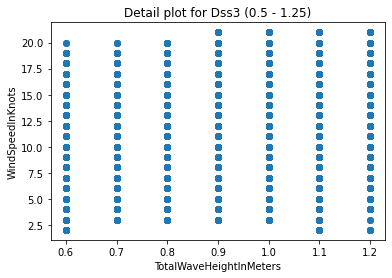

In [60]:
plt.scatter(df_plot.TotalWaveHeightInMeters,df_plot.WindSpeedInKnots)
plt.xlabel('TotalWaveHeightInMeters')
plt.ylabel('WindSpeedInKnots')
plt.title('Detail plot for Dss3 (0.5 - 1.25)')

# Machine learning for Linear Regression

In [29]:
# Remove column name 'A' for Linear Regresion
df_lg = df.drop(['VesselName','GPSTimeStamp','Latitude','Longitude','Cog','Sog','Beaufort','SeaHeightInMeters','TotalWaveHeightInMeters','SwellDirectionInDegrees','SeaCurrentSpeedInKnots','SeaCurrentDirectionInDegrees',"TotalWaveDirectionInDegrees"], axis = 1)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lbl_encode = LabelEncoder()

In [32]:
df_lg['Douglas_group_label'] = lbl_encode.fit_transform(df_new['Douglas'])

In [33]:
df_lg['Douglas_group_label'].value_counts()

4    137017
3    106599
2     25868
0       185
1        80
Name: Douglas_group_label, dtype: int64

In [34]:
df_lg['Douglas'].value_counts()

Dss4    137017
Dss3    106599
Dss2     25868
Dss0       185
Dss1        80
Name: Douglas, dtype: int64

In [35]:
df_lg.head(5)

,WindSpeedInKnots,WindDirectionInDegrees,Douglas,Douglas_group_label
3,20,284,Dss4,4
53,14,106,Dss4,4
63,17,39,Dss4,4
64,16,53,Dss4,4
65,14,40,Dss3,3


In [48]:
ouput = df_lg.Douglas_group_label

In [49]:
df_lg_f = df_lg.drop(['Douglas','Douglas_group_label'], axis = 1)

In [50]:
df_lg_f.head(1)

,WindSpeedInKnots,WindDirectionInDegrees
3,20,284


In [51]:
feed = df_lg_f

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feed, ouput, test_size = 0.2)

In [53]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [54]:
reg.score(X_test, y_test)

0.25075664541644593

# END

In [16]:
#dff = df.filter(['WindSpeedInKnots','Beaufort','SeaHeightInMeters','Douglas','WindDirectionInDegrees', 'TotalWaveDirectionInDegrees'], axis=1)

In [17]:
dff.head()

,WindSpeedInKnots,Beaufort,SeaHeightInMeters,Douglas,WindDirectionInDegrees,TotalWaveDirectionInDegrees
3,20,B5,0.56,Dss3,284,284
53,14,B4,1.26,Dss4,106,310
63,17,B5,0.24,Dss2,39,39
64,16,B4,0.34,Dss2,53,53
65,14,B4,0.70,Dss3,40,40


# TALLY

In [18]:
dff['Beaufort'].value_counts()

B4    291013
B3    182573
B5    154362
B2     68230
B1      2077
B0        42
Name: Beaufort, dtype: int64

In [19]:
dff['Douglas'].value_counts()

Dss3    279680
Dss4    278540
Dss2    132234
Dss1      4782
Dss0      3061
Name: Douglas, dtype: int64

In [20]:
occur = dff.groupby(['Beaufort', 'Douglas']).size()

In [21]:
display(occur)

Beaufort  Douglas
B0        Dss0           42
B1        Dss0          258
          Dss1           21
          Dss2          650
          Dss3          659
          Dss4          489
B2        Dss0          781
          Dss1          191
          Dss2        23361
          Dss3        27577
          Dss4        16320
B3        Dss0          555
          Dss1          276
          Dss2        41364
          Dss3        83942
          Dss4        56436
B4        Dss0          696
          Dss1         1942
          Dss2        41326
          Dss3       115930
          Dss4       131119
B5        Dss0          729
          Dss1         2352
          Dss2        25533
          Dss3        51572
          Dss4        74176
dtype: int64

In [23]:
Group5 = dff[dff['Beaufort'].str.contains('B5')]

In [24]:
Group5.reset_index()

,index,WindSpeedInKnots,Beaufort,SeaHeightInMeters,Douglas,WindDirectionInDegrees,TotalWaveDirectionInDegrees
0,3,20,B5,0.56,Dss3,284,284
1,63,17,B5,0.24,Dss2,39,39
2,97,18,B5,0.87,Dss3,160,160
3,98,20,B5,0.73,Dss3,197,197
4,99,17,B5,0.91,Dss3,227,227
...,...,...,...,...,...,...,...
154357,2129010,17,B5,0.96,Dss3,50,50
154358,2129018,18,B5,1.30,Dss4,70,70
154359,2129019,17,B5,1.35,Dss4,70,70
154360,2129020,19,B5,1.20,Dss3,70,70


In [27]:
Group5_Dss3 = Group5[Group5['Douglas'].str.contains('Dss3|Dss4')]

In [31]:
Group5_Dss3.tail(20)

,WindSpeedInKnots,Beaufort,SeaHeightInMeters,Douglas,WindDirectionInDegrees,TotalWaveDirectionInDegrees
2128682,21,B5,0.90,Dss3,300,300
2128683,21,B5,0.90,Dss3,300,300
2128684,21,B5,0.89,Dss3,300,300
2128685,21,B5,0.89,Dss3,300,300
2128686,21,B5,0.90,Dss3,300,300
2128687,21,B5,0.90,Dss3,300,300
2128688,21,B5,0.90,Dss3,300,300
2128689,21,B5,0.90,Dss3,300,300
2128690,21,B5,0.90,Dss3,300,300
2128691,21,B5,0.90,Dss3,300,300



# Plotting Correlation

In [40]:
data=Group5_Dss3.sample(500)  #selecting random samples

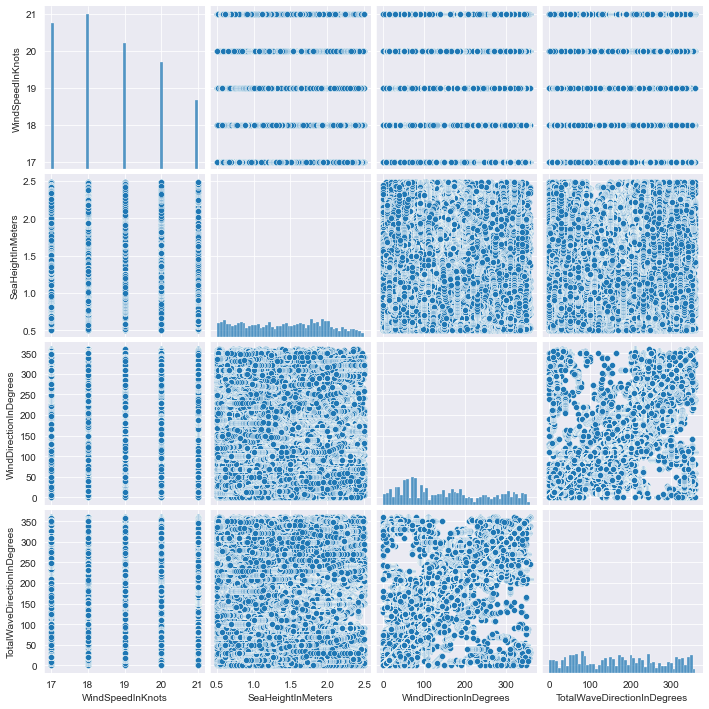

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')
sns.pairplot(Group5_Dss3);

Text(0, 0.5, 'Wave height (m)')

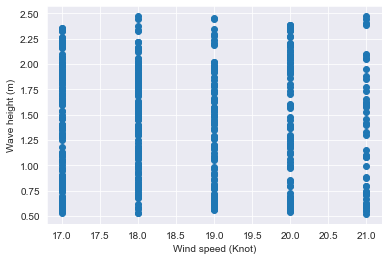

In [41]:
plt.scatter(data.WindSpeedInKnots,data.SeaHeightInMeters)
plt.xlabel('Wind speed (Knot)')
plt.ylabel('Wave height (m)')

In [37]:
Group5_Dss3.corr().style.background_gradient(cmap="Blues")    #correlation

,WindSpeedInKnots,SeaHeightInMeters,WindDirectionInDegrees,TotalWaveDirectionInDegrees
WindSpeedInKnots,1.000000,0.014372,0.038658,-0.007287
SeaHeightInMeters,0.014372,1.000000,-0.243496,-0.126222
WindDirectionInDegrees,0.038658,-0.243496,1.000000,0.682363
TotalWaveDirectionInDegrees,-0.007287,-0.126222,0.682363,1.000000
